In [1]:
import helpers
import numpy as np
import re 
import networkx as nx

#helpers.npNicePrint(arr)

data = """x00: 1
x01: 0
x02: 1
x03: 1
x04: 0
y00: 1
y01: 1
y02: 1
y03: 1
y04: 1

ntg XOR fgs -> mjb
y02 OR x01 -> tnw
kwq OR kpj -> z05
x00 OR x03 -> fst
tgd XOR rvg -> z01
vdt OR tnw -> bfw
bfw AND frj -> z10
ffh OR nrd -> bqk
y00 AND y03 -> djm
y03 OR y00 -> psh
bqk OR frj -> z08
tnw OR fst -> frj
gnj AND tgd -> z11
bfw XOR mjb -> z00
x03 OR x00 -> vdt
gnj AND wpb -> z02
x04 AND y00 -> kjc
djm OR pbm -> qhw
nrd AND vdt -> hwm
kjc AND fst -> rvg
y04 OR y02 -> fgs
y01 AND x02 -> pbm
ntg OR kjc -> kwq
psh XOR fgs -> tgd
qhw XOR tgd -> z09
pbm OR djm -> kpj
x03 XOR y03 -> ffh
x00 XOR y04 -> ntg
bfw OR bqk -> z06
nrd XOR fgs -> wpb
frj XOR qhw -> z04
bqk OR frj -> z07
y03 OR x01 -> nrd
hwm AND bqk -> z03
tgd XOR rvg -> z12
tnw OR pbm -> gnj"""

with open("input_24.txt", 'r') as f:
    data = f.read().rstrip()

gates, wires = data.split("\n\n")
G = nx.DiGraph()

gates = {gate.split(": ")[0]: int(gate.split(": ")[1]) for gate in gates.split("\n")}
G.add_nodes_from(gates.keys())
print(gates)
#print(colors, designs)

# Regex pattern
pattern = r"^(.*)\s+(AND|OR|XOR)\s+(.*)\s+->\s+(.*)$"

operations = {}

# Parse each line
for line in wires.splitlines():
    match = re.match(pattern, line)
    if match:
        var1, operator, var2, result = match.groups()
        if result in operations.keys():
            print("duplicate keys")
        operations[result] = (var1, operator, var2)
        G.add_edge(var1, result)
        G.add_edge(var2, result)
        #print(f"var1: {var1}, operator: {operator}, var2: {var2}, result: {result}")
    else:
        print(f"No match for line: {line}")


def safe_get(grid, index):
    try:
        return grid[tuple(index)]
    except:
        return ""
    
#changeDict = {"forward": np.array([1,0]), "down": np.array([0,1]), "up": np.array([0,-1])}
#data = [changeDict[x.split(" ")[0]] * int(x.split(" ")[1]) for x in data.split("\n") if x]

#np.prod(sum(data))    
#data = [list(map(int, x.split(" "))) for x in data.split('\n') if not x == ""]

#data = [(int(row.split(",")[0]),int(row.split(",")[1])) for row in data.split("\n")]

#grid, moves = data.split("\n\n")
#moves = moves.replace("\n", "")

#grid = {(x,y): str(val) for y, r in enumerate(data.split('\n')) for x, val in enumerate(r)}
#grid
#data = [str(x).split("-") for x in data.split("\n")]
#data

# Output the parsed data
#print(data)


#grid = {(x,y): "." for x in range(max_coor+1) for y in range(max_coor+1)}

#helpers.visualize_dict_grid(grid) 

{'x00': 1, 'x01': 1, 'x02': 1, 'x03': 1, 'x04': 0, 'x05': 1, 'x06': 0, 'x07': 1, 'x08': 0, 'x09': 1, 'x10': 1, 'x11': 1, 'x12': 1, 'x13': 0, 'x14': 1, 'x15': 0, 'x16': 0, 'x17': 1, 'x18': 0, 'x19': 1, 'x20': 0, 'x21': 0, 'x22': 0, 'x23': 1, 'x24': 0, 'x25': 0, 'x26': 1, 'x27': 1, 'x28': 0, 'x29': 0, 'x30': 1, 'x31': 1, 'x32': 1, 'x33': 1, 'x34': 1, 'x35': 0, 'x36': 1, 'x37': 0, 'x38': 1, 'x39': 1, 'x40': 0, 'x41': 0, 'x42': 0, 'x43': 0, 'x44': 1, 'y00': 1, 'y01': 1, 'y02': 1, 'y03': 1, 'y04': 1, 'y05': 0, 'y06': 0, 'y07': 0, 'y08': 0, 'y09': 0, 'y10': 1, 'y11': 0, 'y12': 0, 'y13': 0, 'y14': 1, 'y15': 1, 'y16': 0, 'y17': 1, 'y18': 0, 'y19': 1, 'y20': 0, 'y21': 0, 'y22': 0, 'y23': 0, 'y24': 1, 'y25': 1, 'y26': 0, 'y27': 1, 'y28': 0, 'y29': 1, 'y30': 1, 'y31': 1, 'y32': 1, 'y33': 0, 'y34': 1, 'y35': 1, 'y36': 1, 'y37': 1, 'y38': 0, 'y39': 1, 'y40': 0, 'y41': 0, 'y42': 1, 'y43': 0, 'y44': 1}


In [2]:
def set_number(x,y):
    if x < 2**44 and y < 2**44:
        # Convert x and y into 45-bit binary strings
        x_bin = f"{x:045b}"
        y_bin = f"{y:045b}"

        # Create a dictionary with updated values for x and y
        bits = {}
        for i, bit in enumerate(reversed(x_bin)):
            bits[f'x{i:02}'] = int(bit)
        for i, bit in enumerate(reversed(y_bin)):
            bits[f'y{i:02}'] = int(bit)

        return bits
    else:
        print("number too high")
        
#gates = set_number(900000,160000000)

In [3]:
def get_z(topo_sort, gates_z):

    if not nx.is_directed_acyclic_graph(G):
        #print("Graph is not a DAG")
        return -1, -1

    # Perform topological sort
    for node in list(topo_sort):
        if node in operations:
            op1, operation, op2 = operations[node]
            if operation == "AND":
                gates_z[node] = gates_z[op1] & gates_z[op2]
            elif operation == "OR":
                gates_z[node] = gates_z[op1] | gates_z[op2]
            elif operation == "XOR":
                gates_z[node] = gates_z[op1] ^ gates_z[op2]
            else:
                print("error no operation found")

    # Extract keys starting with 'z' and sort them by their numeric suffix
    z_keys = sorted((key for key in gates_z if key.startswith('z')), reverse=True)

    # Construct the binary string
    binary_string = ''.join(str(gates_z[key]) for key in z_keys)

    # Convert the binary string to a decimal integer
    #print(binary_string)
    decimal_value = int(binary_string, 2)
    return decimal_value, binary_string
    
topo_sort_orig = list(nx.topological_sort(G))

In [4]:
import random

def generate_random_numbers(seed, count, max_value):
    random.seed(seed)  # Set the seed for reproducibility
    return [random.randint(0, max_value) for _ in range(count)]

# Parameters
seed_x = 42  # Seed for x values
seed_y = 43  # Seed for y values (different to ensure unique sequences)
count = 40   # Number of random numbers to generate
max_value = 2**44  # Upper bound for the random numbers

# Generate the lists for x and y
x_values = generate_random_numbers(seed_x, count, max_value)
y_values = generate_random_numbers(seed_y, count, max_value)

In [5]:
#x_values

In [6]:
#topo_sort = topo_sort_orig.copy()
keys = []
key1 = "mvb"
key2 = "z08"
operations[key1], operations[key2] = operations[key2], operations[key1]
edges_key1 = list(G.in_edges(key1))
edges_key2 = list(G.in_edges(key2))
G.remove_edges_from(edges_key1)
G.remove_edges_from(edges_key2)
for u, _ in edges_key1:
    G.add_edge(u, key2)
for u, _ in edges_key2:
    G.add_edge(u, key1)
keys.append(key1)
keys.append(key2)
 
key1 = "rds"
key2 = "jss"
operations[key1], operations[key2] = operations[key2], operations[key1]
edges_key1 = list(G.in_edges(key1))
edges_key2 = list(G.in_edges(key2))
G.remove_edges_from(edges_key1)
G.remove_edges_from(edges_key2)
for u, _ in edges_key1:
    G.add_edge(u, key2)
for u, _ in edges_key2:
    G.add_edge(u, key1)
keys.append(key1)
keys.append(key2)
    
key1 = "z18" 
key2 = "wss"
operations[key1], operations[key2] = operations[key2], operations[key1]
edges_key1 = list(G.in_edges(key1))
edges_key2 = list(G.in_edges(key2))
G.remove_edges_from(edges_key1)
G.remove_edges_from(edges_key2)
for u, _ in edges_key1:
    G.add_edge(u, key2)
for u, _ in edges_key2:
    G.add_edge(u, key1)
keys.append(key1)
keys.append(key2)
    
key1 = "z23"
key2 = "bmn"
operations[key1], operations[key2] = operations[key2], operations[key1]
edges_key1 = list(G.in_edges(key1))
edges_key2 = list(G.in_edges(key2))
G.remove_edges_from(edges_key1)
G.remove_edges_from(edges_key2)
for u, _ in edges_key1:
    G.add_edge(u, key2)
for u, _ in edges_key2:
    G.add_edge(u, key1)
keys.append(key1)
keys.append(key2)
    
errors = [] 
    
#or x in range(2**44):
for x in range(-1, 44):
    for y in range(-1, 44):
        if x == -1:
            num_x = 0
        else:
            num_x = 2**x
        if y == -1:
            num_y = 0
        else:
            num_y = 2**y
        #gates = set_number(x,0)
        z_dec, z_bin = get_z(nx.topological_sort(G), set_number(num_x,num_y))
        if not num_x + num_y == z_dec:
            errors.append([(x,y), (num_x, num_y)])
            
for x in x_values:
    for y in y_values:
        z_dec, z_bin = get_z(nx.topological_sort(G), set_number(x,y))
        if not x + y == z_dec:
            errors.append([(x,y), (x, y)])
            
            
print(len(errors))
",".join(sorted(keys))  


0


'bmn,jss,mvb,rds,wss,z08,z18,z23'

In [ ]:
x > 255 fails 
#mvb, z08 swap succesful 257 errors 
#z09, z08 swap succesful 338 errors [should be wrong]
#ggm, z08 swap succesful 258 errors [this this is wrong]

#mvb, z08

(1, 16384) fails
#scs, jss swap succesful 176 errors                  177 errors
#pdq, jss swap succesful 176 errors                  177 errors
#z15, z14 swap succesful 257 errors                  258 errors
#hmt, jss swap succesful 175 errors                  176 errors
#rds, jss swap succesful 174 errors -> pick this one 175 errors -> pick this one
#z14, jss swap succesful 175 errors                  176 errors
#z14, tsg swap succesful 175 errors                  176 errors

#mvb, z08, rds, jss

(1, 262144) fails
#z19, z18 swap succesful 336 errors
#z18, wss swap succesful 88 errors
#z18, nws swap succesful 88 errors
#z18, fmm swap succesful 89 errors

#mvb, z08, rds, jss, z18, [wss,nws]

(1, 8388608) fails

#fwj, bmn swap succesful 0 errrs wrong!
#fwj, z24 swap succesful 86 errors
#fwj, qmd swap succesful 257 errors
#z23, bmn swap succesful 0 errors
#z23, z24 swap succesful 86 errors
#bmn, vsq swap succesful 1 error
#z24, vsq swap succesful 87 errors

#bmn,jss,mvb,rds,wss,z08,z18,z23 
#I did it hahaha

In [5]:
errors

[[(23, 23), (8388608, 8388608)]]

In [7]:
2**0 + 2**18

262145

In [6]:
from itertools import combinations
from tqdm import tqdm
x_con, y_con = 1, 8388608
key_pairs = list(combinations(operations.keys(), 2))
G_original = G.copy()
for key1, key2 in key_pairs:
    #print(nx.is_isomorphic(G, G_original))
    # Swap the values of the two keys
    #print(operations[key1], operations[key2] )
    operations[key1], operations[key2] = operations[key2], operations[key1]
    #print(f"Swapped {key1} with {key2}:")
    #print(operations[key1], operations[key2] )
    edges_key1 = list(G.in_edges(key1))
    edges_key2 = list(G.in_edges(key2))
    G.remove_edges_from(edges_key1)
    G.remove_edges_from(edges_key2)

    # Add swapped edges
    for u, _ in edges_key1:
        G.add_edge(u, key2)
    for u, _ in edges_key2:
        G.add_edge(u, key1)
    try: 
        z_dec, z_bin = get_z(nx.topological_sort(G), set_number(x_con, y_con))
        #print(f"{z_dec}")
        if x_con + y_con == z_dec:
             print(f"{key1}, {key2} swap succesful")
        #else:
        #    print(z_dec)
    except:
        pass

    #print(operations[key1], operations[key2] )
    # Swap them back to preserve the original dictionary state (optional)
    operations[key1], operations[key2] = operations[key2], operations[key1]
    G = G_original.copy()
    #break

fwj, bmn swap succesful
fwj, z24 swap succesful
fwj, qmd swap succesful
z23, bmn swap succesful
z23, z24 swap succesful
bmn, vsq swap succesful
z24, vsq swap succesful


In [43]:
gates

{'x00': 0,
 'x01': 0,
 'x02': 0,
 'x03': 0,
 'x04': 0,
 'x05': 0,
 'x06': 0,
 'x07': 0,
 'x08': 0,
 'x09': 0,
 'x10': 0,
 'x11': 0,
 'x12': 0,
 'x13': 0,
 'x14': 0,
 'x15': 0,
 'x16': 0,
 'x17': 0,
 'x18': 0,
 'x19': 0,
 'x20': 0,
 'x21': 0,
 'x22': 0,
 'x23': 0,
 'x24': 0,
 'x25': 0,
 'x26': 0,
 'x27': 0,
 'x28': 0,
 'x29': 0,
 'x30': 0,
 'x31': 0,
 'x32': 0,
 'x33': 0,
 'x34': 0,
 'x35': 0,
 'x36': 0,
 'x37': 0,
 'x38': 0,
 'x39': 0,
 'x40': 0,
 'x41': 0,
 'x42': 0,
 'x43': 0,
 'x44': 0,
 'y00': 0,
 'y01': 0,
 'y02': 0,
 'y03': 0,
 'y04': 0,
 'y05': 0,
 'y06': 0,
 'y07': 0,
 'y08': 0,
 'y09': 0,
 'y10': 0,
 'y11': 0,
 'y12': 0,
 'y13': 0,
 'y14': 0,
 'y15': 0,
 'y16': 0,
 'y17': 0,
 'y18': 0,
 'y19': 0,
 'y20': 0,
 'y21': 0,
 'y22': 0,
 'y23': 0,
 'y24': 0,
 'y25': 0,
 'y26': 0,
 'y27': 0,
 'y28': 0,
 'y29': 0,
 'y30': 0,
 'y31': 0,
 'y32': 0,
 'y33': 0,
 'y34': 0,
 'y35': 0,
 'y36': 0,
 'y37': 0,
 'y38': 0,
 'y39': 0,
 'y40': 0,
 'y41': 0,
 'y42': 0,
 'y43': 0,
 'y44': 0,
 'nhn': 0,

The graph is a DAG!


<IPython.core.display.Javascript object>


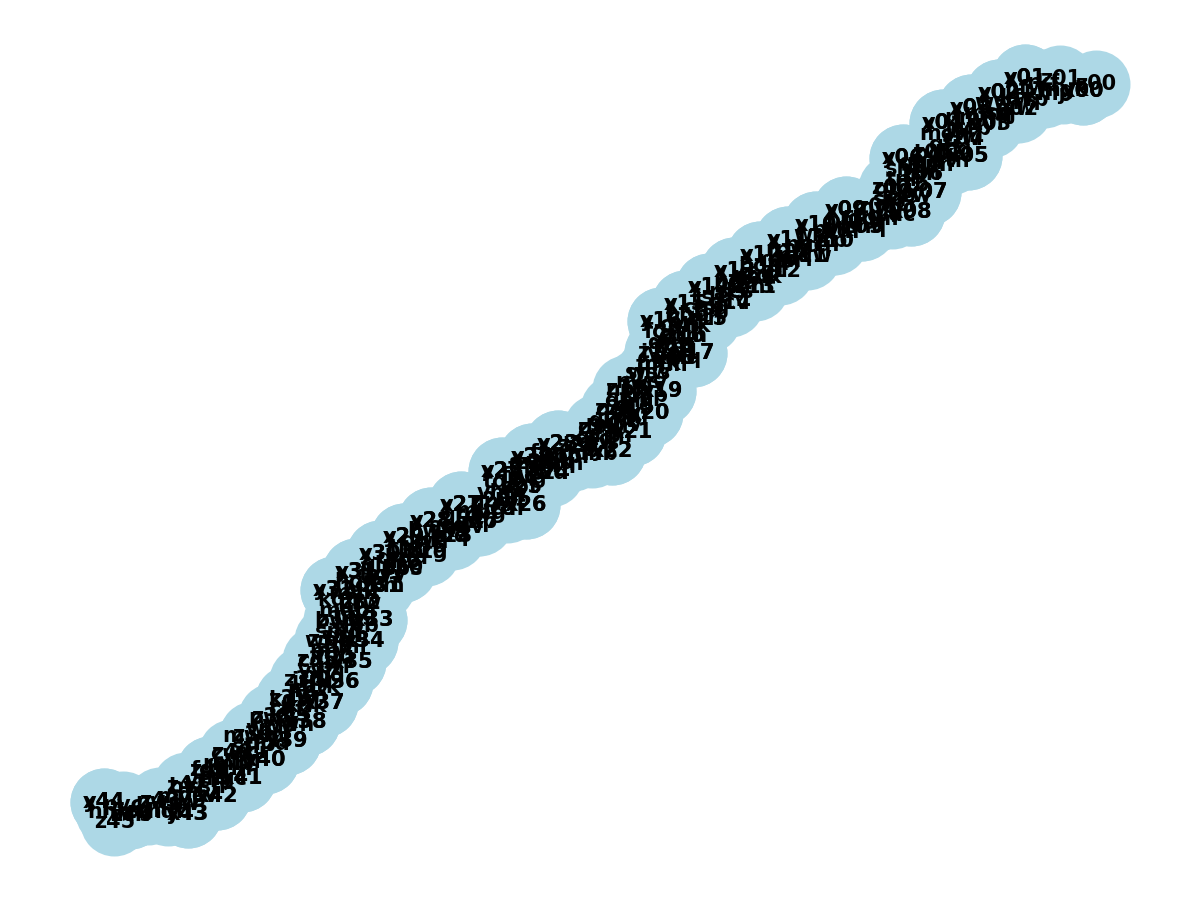

c:\users\husp\appdata\local\programs\python\python37-32\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
c:\users\husp\appdata\local\programs\python\python37-32\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


In [12]:
%matplotlib notebook
import matplotlib.pyplot as plt

# Ensure it's a DAG
if nx.is_directed_acyclic_graph(G):
    print("The graph is a DAG!")

# Plot the DAG
plt.figure(figsize=(8, 6))
pos = nx.kamada_kawai_layout(G)  # Compute positions for nodes
nx.draw(G, pos, with_labels=True, node_size=1000, node_color="lightblue", font_size=10, font_weight="bold", arrowsize=20)
plt.title("Directed Acyclic Graph (DAG)", fontsize=14)
plt.show()

In [ ]:
x > 255 fails 
#mvb, z08 swap succesful 257 errors 
#z09, z08 swap succesful 338 errors [should be wrong]
#ggm, z08 swap succesful 258 errors -> pick this one

#ggm, z08

(1, 16384) fails
#scs, jss swap succesful 177
#pdq, jss swap succesful 177 errors
#z15, z14 swap succesful 258 errors
#hmt, jss swap succesful 176 errors
#rds, jss swap succesful 175 errors -> pick this one
#z14, jss swap succesful 176 errors
#z14, tsg swap succesful 176 errors

#ggm, z08, rds, jss

(256, 256) fails
#wdc, rpg swap succesful
#wdc, z09 swap succesful

#wdc, ggm swap succesful
#rpg, z08 swap succesful
#z09, z08 swap succesful
#ggm, z08 swap succesful